# Kernel Principal Component Analysis (KPCA) - NonLinear Technique

In [1]:
# Import necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Import the dataset
dataset = pd.read_csv('LR.csv')
dataset

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [3]:
# Break the Dataset into Dependent and Independent Variables
X=dataset.iloc[:,[0, 1]].values
y=dataset.iloc[:,2].values

In [4]:
#Training and Testing Data (divide the data into two part)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.25, random_state=0)

In [5]:
# Standardize our Data for better prediction
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
# Applying KPCA
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components = 2, kernel ='rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

X_train

array([[ 5.72744226e-02,  6.24922807e-01],
       [ 2.98039307e-01, -5.51069360e-01],
       [-3.27976660e-01,  4.20258944e-01],
       [ 4.01548277e-01, -5.35102802e-01],
       [ 3.75772744e-01,  3.97751670e-01],
       [ 6.42311009e-01, -1.10617361e-01],
       [-2.56837573e-01,  4.81210460e-01],
       [-2.94482629e-01,  3.46410210e-01],
       [-4.31908142e-01,  2.99204966e-01],
       [-3.86586082e-01,  2.06873996e-01],
       [-3.21858102e-01,  1.95600303e-01],
       [-4.75084810e-01,  2.32980852e-01],
       [ 5.50313474e-02,  3.54497244e-01],
       [ 2.32890100e-01,  6.30465977e-01],
       [ 4.33616862e-01,  2.04540417e-01],
       [ 3.83876726e-01,  4.82196197e-01],
       [ 6.48954007e-01, -4.19483401e-01],
       [-1.96271810e-01, -3.79585721e-01],
       [ 3.66579350e-01,  2.54812085e-01],
       [ 2.36781120e-01,  6.24132097e-01],
       [-2.76582419e-01, -2.32375547e-01],
       [ 5.35407237e-01, -1.24159987e-01],
       [ 3.87166412e-01, -4.05416881e-01],
       [ 3.

In [7]:
# Training our Logistic Regression model
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [8]:
# Predict our testing data

y_pred= classifier.predict(X_test)

In [9]:
# Create Confusion Matrix to see the accuracy
# note: Right digonal shows correct predictions while left digonal shows wrong predictions
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[64,  4],
       [ 6, 26]], dtype=int64)

In [10]:
# To find accuracy of our model
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


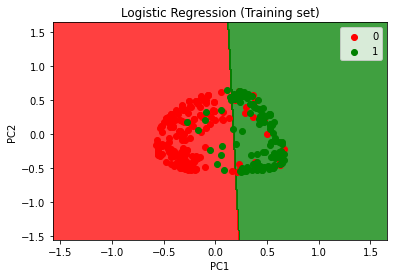

In [12]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


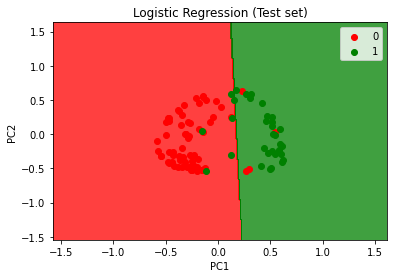

In [13]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Comment: In these graphs, red points in green portion and green points in red portion are the errors